In [1]:
import h5py
import galaxychop as gchop
import uttr
import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Leo la galaxia

In [2]:
gal = gchop.read_hdf5("../galaxy-chop/tests/datasets/gal394242.h5")

In [3]:
gal = gchop.center(gal)
gal = gchop.star_align(gal)

In [4]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,-0.054824,-0.063223,-0.260845,5.949678,22.550460,-6.055106,0.0,-195699.620206,290.293111,-195409.327095,6.264991,-1.883910,-0.860159
1,stars,0,9.745897e+05,-0.161120,-0.127723,-0.177528,21.909445,8.321999,-0.535136,0.0,-196176.962277,274.782915,-195902.179362,1.545736,-3.975758,1.457514
2,stars,0,6.935776e+05,-0.256088,-0.165705,-0.196836,-9.493458,7.263093,15.637166,0.0,-195152.120168,193.699612,-194958.420557,-1.161512,5.873138,-3.433097
3,stars,0,1.070959e+06,-0.235092,-0.256281,-0.369501,-9.675913,-5.471289,-0.817244,0.0,-194695.767625,62.113089,-194633.654536,-1.812200,3.383127,-1.193495
4,stars,0,6.013803e+05,-0.076621,-0.199932,-0.282408,16.533770,8.094719,-17.010778,0.0,-195703.942688,314.128285,-195389.814402,5.687005,-5.972652,2.685397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57279,gas,2,1.400046e+06,-2.245883,2.358065,-8.389589,-18.031673,34.561220,-269.322856,0.0,-129252.826165,37027.209909,-92225.616256,-345.126246,-453.589180,-35.100593
57280,gas,2,1.375867e+06,-1.333431,2.056292,8.098147,-3.554033,-10.650944,275.247567,0.0,-129835.893336,37943.648417,-91892.244919,652.242363,338.242612,21.510432
57281,gas,2,9.908498e+05,-9.278659,-0.275191,2.774880,-147.978426,-203.402319,73.776431,0.0,-132966.102621,34356.539847,-98609.562774,544.114355,273.923985,1846.578340
57282,gas,2,1.456959e+06,-5.980264,5.097995,4.875443,-192.738278,87.675395,217.206835,0.0,-132205.106762,46006.913910,-86198.192853,679.862938,359.269707,458.256750


In [5]:
dfs = pd.read_pickle('df_stars.pkl')

In [6]:
print(len(gal.stars.x))
print(len(dfs.lab_th))

32067
32067


In [7]:
dfs

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,...,lab_th,lab_ab,lab_cr,lab_km,lab_km3,lab_km4,lab_gmm,lab_gmm3,lab_gmm4,lab_agmm
0,stars,0,5.224283e+05,-0.054824,-0.063223,-0.260845,5.949678,22.550460,-6.055106,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
1,stars,0,9.745897e+05,-0.161120,-0.127723,-0.177528,21.909445,8.321999,-0.535136,0.0,...,0.0,1.0,1.0,0.0,2.0,3.0,0.0,2.0,1.0,1.0
2,stars,0,6.935776e+05,-0.256088,-0.165705,-0.196836,-9.493458,7.263093,15.637166,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
3,stars,0,1.070959e+06,-0.235092,-0.256281,-0.369501,-9.675913,-5.471289,-0.817244,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
4,stars,0,6.013803e+05,-0.076621,-0.199932,-0.282408,16.533770,8.094719,-17.010778,0.0,...,0.0,0.0,1.0,0.0,2.0,3.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32062,stars,0,1.343808e+06,15.394374,-13.615094,0.149480,249.650695,244.472680,-41.765153,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
32063,stars,0,7.382408e+05,-7.436244,16.466565,-0.735001,-267.224099,281.248845,-52.902787,0.0,...,0.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0
32064,stars,0,6.786477e+05,15.171295,-10.470204,-6.430860,-353.009725,159.227328,-72.137340,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0
32065,stars,0,8.290853e+05,14.695170,15.612993,-5.270562,-4.742671,263.201137,314.186911,0.0,...,0.0,1.0,1.0,1.0,2.0,3.0,0.0,1.0,2.0,1.0


In [8]:
dfs.isnull().sum()

ptype               0
ptypev              0
m                   0
x                   0
y                   0
z                   0
vx                  0
vy                  0
vz                  0
softening           0
potential           0
kinetic_energy      0
total_energy        0
Jx                  0
Jy                  0
Jz                  0
lab_th            164
lab_ab            164
lab_cr            164
lab_km            164
lab_km3           164
lab_km4           164
lab_gmm           164
lab_gmm3          164
lab_gmm4          164
lab_agmm          164
dtype: int64

In [9]:
dfs2 = dfs[dfs['lab_th'].notna()]
print(len(dfs2.lab_th))

31903


# Analisis Confusion Matrix (% Particulas)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Abadi vs Threshold

In [11]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_ab
y_pred=dfs2.lab_th
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

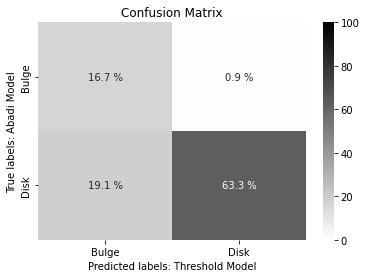

In [12]:
ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', vmin=0, vmax=100, center=50, ax=ax)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: Threshold Model');ax.set_ylabel('True labels: Abadi Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

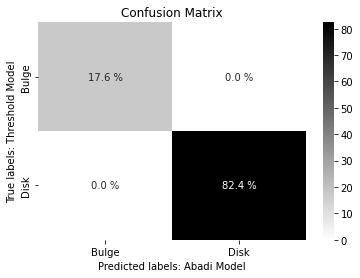

In [13]:
y_tue=dfs2.lab_th
y_pred=dfs2.lab_ab
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: Abadi Model');ax.set_ylabel('True labels: Threshold Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

<AxesSubplot:xlabel='eps', ylabel='Density'>

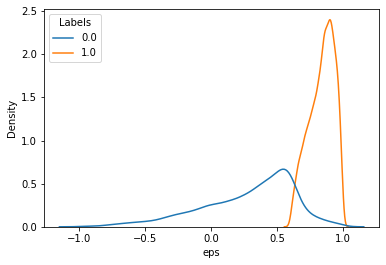

In [14]:
gal.plot.circ_kde("eps",labels=dfs2.lab_gmm)

## Abadi vs KMeans

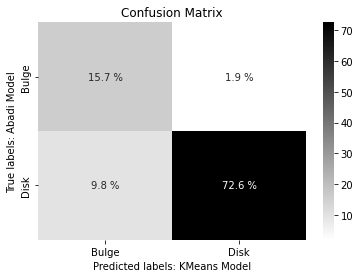

In [15]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_ab
y_pred=dfs2.lab_km
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)
ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: KMeans Model');ax.set_ylabel('True labels: Abadi Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk'])
ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

## Abadi vs JE-Histogram (Critiani)

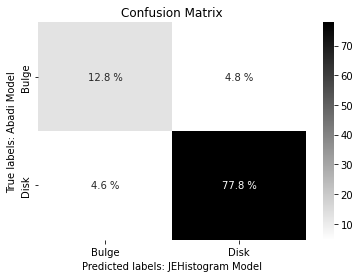

In [16]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_ab
y_pred=dfs2.lab_cr
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: JEHistogram Model');ax.set_ylabel('True labels: Abadi Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

## Confusion Materix All models (2 components)

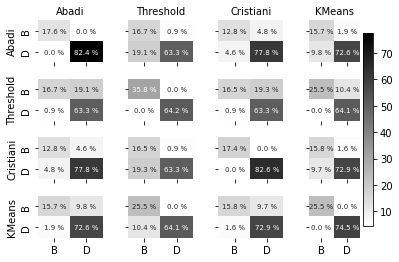

In [17]:
def plotter(y_true,y_pred,ax):
    #y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
    cm = confusion_matrix(y_true, y_pred); cm_per = cm*100/len(y_true)
    sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', annot_kws={"size": 7},
                vmin=0, vmax=100, center=50, cbar=False, ax=ax)
    for t in ax.texts: t.set_text(t.get_text() + " %")
    return ax



fig,axes = plt.subplots(4, 4, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4,wspace=0.4)
#axes
ax1=axes[0,0]; ax2=axes[0,1]; ax3=axes[0,2]; ax4=axes[0,3]#; ax5=axes[0,4]
ax6=axes[1,0]; ax7=axes[1,1]; ax8=axes[1,2]; ax9=axes[1,3]#; ax10=axes[1,4]
ax11=axes[2,0]; ax12=axes[2,1]; ax13=axes[2,2]; ax14=axes[2,3]#; ax15=axes[2,4]
ax16=axes[3,0]; ax17=axes[3,1]; ax18=axes[3,2]; ax19=axes[3,3]#; ax20=axes[3,4]
#ax21=axes[4,0]; ax22=axes[4,1]; ax23=axes[4,2]; ax24=axes[4,3]; ax25=axes[4,4]

############ Fila 1 ##############################    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax1)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax2)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax3)
    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax4)


############ Fila 2 ############################## 
y_true=dfs2.lab_th; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax6)

y_true=dfs2.lab_th; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax7)

y_true=dfs2.lab_th; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax8)

y_true=dfs2.lab_th; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax9)


############ Fila 3 ##############################   
y_true=dfs2.lab_cr; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax11)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax12)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax13)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax14)


############ Fila 4 ##############################  
y_true=dfs2.lab_km; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax16)

y_true=dfs2.lab_km; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax17)

y_true=dfs2.lab_km; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax18)

y_true=dfs2.lab_km; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax19)


########################################## 
#Tick-label
ax16.xaxis.set_ticklabels(['B', 'D'])
ax16.yaxis.set_ticklabels(['B', 'D']);

#Title
ax1.set_title('Abadi', fontsize=10)
ax2.set_title('Threshold', fontsize=10)
ax3.set_title('Cristiani', fontsize=10)
ax4.set_title('KMeans', fontsize=10)
#ax5.set_title('GMM', fontsize=10)
ax1.set_ylabel('Abadi', fontsize=10)
ax6.set_ylabel('Threshold', fontsize=10) 
ax11.set_ylabel('Cristiani', fontsize=10) 
ax16.set_ylabel('KMeans', fontsize=10) 
#ax21.set_ylabel('GMM', fontsize=10) 

#cbar_ax = fig.add_axes([1.1, .3, .03, .4])


#fig.colorbar(ax1.pcolormesh(cm_per, cmap='binary'), ax=cbar_ax )
fig.colorbar(ax1.pcolormesh(cm_per, cmap='binary'), ax=axes[:,3])



#plt.savefig('gchop_plots/matrix.png', dpi=200)

##  Confusion Matrix: 3comp

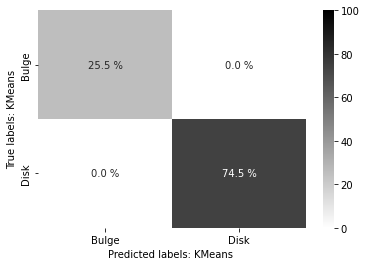

In [18]:
#######km vs km
ax= plt.subplot()
y_true=dfs2.lab_km
y_pred=dfs2.lab_km
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax,  vmin=0, vmax=100, center=50)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: KMeans ');ax.set_ylabel('True labels: KMeans'); 
#ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Bulge','Disk'])
ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

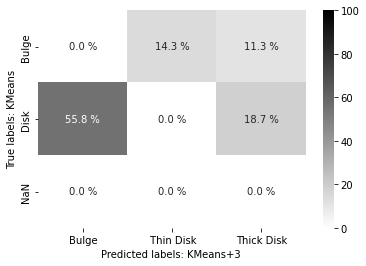

In [19]:
#######km vs km+3
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_km
y_pred=dfs2.lab_km3
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax,  vmin=0, vmax=100, center=50)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: KMeans+3 ');ax.set_ylabel('True labels: KMeans'); 
#ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Bulge', ' Thin Disk', 'Thick Disk'])
ax.yaxis.set_ticklabels(['Bulge', 'Disk', 'NaN']);


# El 74% de las particulas estelares del disco-km, estan divididas en disco fino y gruso de km+3.
# El 26% de las particulas estelares del bulge-km, estan divididas en disco grueso y bulge de km+3


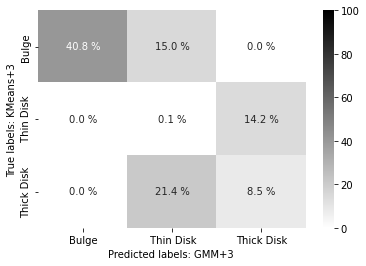

In [20]:
#######km+3 vs gmm+3
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_km3
y_pred=dfs2.lab_gmm3
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax,  vmin=0, vmax=100, center=50)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: GMM+3 ');ax.set_ylabel('True labels: KMeans+3'); 
#ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Bulge', ' Thin Disk', 'Thick Disk'])
ax.yaxis.set_ticklabels(['Bulge', ' Thin Disk', 'Thick Disk']);


## Confusion Matrix 4 comp

Text(33.0, 0.5, 'AGMM')

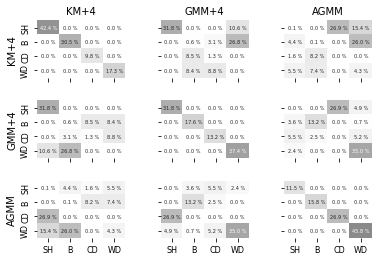

In [21]:
#######km+4 vs gmm+4 vs agmm

def plotter(y_true,y_pred,ax):
    #y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
    cm = confusion_matrix(y_true, y_pred); cm_per = cm*100/len(y_true)
    sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', annot_kws={"size": 5},
                vmin=0, vmax=100, center=50, cbar=False, ax=ax)
    for t in ax.texts: t.set_text(t.get_text() + " %")
    return ax



fig,axes = plt.subplots(3, 3, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4,wspace=0.4)
#axes
ax1=axes[0,0]; ax2=axes[0,1]; ax3=axes[0,2];
ax6=axes[1,0]; ax7=axes[1,1]; ax8=axes[1,2]; 
ax11=axes[2,0]; ax12=axes[2,1]; ax13=axes[2,2]; 


############ Fila 1 ##############################    
y_true=dfs2.lab_km4; y_pred=dfs2.lab_km4
plotter(y_true, y_pred, ax1)

y_true=dfs2.lab_km4; y_pred=dfs2.lab_gmm4
plotter(y_true, y_pred, ax2)

y_true=dfs2.lab_km4; y_pred=dfs2.lab_agmm
plotter(y_true, y_pred, ax3)
    
############ Fila 2 ############################## 
y_true=dfs2.lab_gmm4; y_pred=dfs2.lab_km4
plotter(y_true, y_pred, ax6)

y_true=dfs2.lab_gmm4; y_pred=dfs2.lab_gmm4
plotter(y_true, y_pred, ax7)

y_true=dfs2.lab_gmm4; y_pred=dfs2.lab_agmm
plotter(y_true, y_pred, ax8)

############ Fila 3 ##############################   
y_true=dfs2.lab_agmm; y_pred=dfs2.lab_km4
plotter(y_true, y_pred, ax11)

y_true=dfs2.lab_agmm; y_pred=dfs2.lab_gmm4
plotter(y_true, y_pred, ax12)

y_true=dfs2.lab_agmm; y_pred=dfs2.lab_agmm
plotter(y_true, y_pred, ax13)


########################################## 
#Tick-label
ax11.xaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8)
ax12.xaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8)
ax13.xaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8)
ax1.yaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8);
ax6.yaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8)
ax11.yaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8)

#Title
ax1.set_title('KM+4', fontsize=10)
ax2.set_title('GMM+4', fontsize=10)
ax3.set_title('AGMM', fontsize=10)
ax1.set_ylabel('KM+4', fontsize=10)
ax6.set_ylabel('GMM+4', fontsize=10) 
ax11.set_ylabel('AGMM', fontsize=10)  

#cbar_ax = fig.add_axes([1.1, .3, .03, .4])


#fig.colorbar(ax1.pcolormesh(cm_per, cmap='binary'), ax=cbar_ax )
#fig.colorbar(ax1.pcolormesh(cm_per, cmap='binary'), ax=axes[:,2])


#plt.savefig('gchop_plots/matrix+4.png', dpi=200)

<AxesSubplot:xlabel='eps', ylabel='Density'>

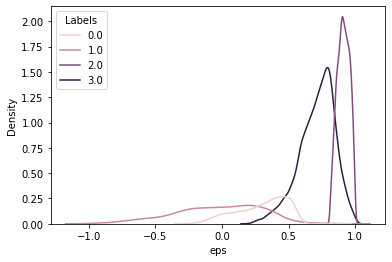

In [22]:
gal.plot.circ_kde("eps",labels=dfs2.lab_agmm)